In [92]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [94]:
df = pd.read_csv("data.csv")

In [95]:
df

,MeOH:H2O,CAN:F3BDC molar ratio,F3BDC (mmol),CAN (mmol),T (°C),HNO3 equivalents,V CAN (mL),V F3BDC (mL),Vfinal (mL),reaction time,yield,PXRD,Success
0,0/100,1:1,0.409,0.450,60,35,1.8,7.2,9.0,2 h,42%,mixed UiO-66/MIL-140,NO
1,0/100,1:1,0.410,0.411,60,24,1.6,6.4,8.0,1 h,44%,UiO-66,NO
2,0/100,1:1,0.363,0.365,80,31,1.5,6.2,7.7,1 h,43%,mixed UiO-66/MIL-140,NO
3,0/100,1:1,0.363,0.365,80,40,1.5,6.2,7.7,2 h,no product,n.a.,NO
4,90/10,1:1,0.375,0.375,60,0,0.8 (H2O),6.8 (MeOH),7.6,1h,14%,MIL-140 A,NO
5,90/10,1:1,0.375,0.375,60,0,0.4 (H2O),3.4 (MeOH),3.8,1h,< 5%,MIL-140 A,NO
6,80/20,1:1,0.375,0.375,60,0,1.5 (H2O),6 (MeOH),7.5,1h,28%,MIL-140 A,YES
7,80/20,1:1,0.375,0.375,70,0,1.5 (H2O),6 (MeOH),7.5,25 min,24%,MIL-140 A,YES
8,80/20,1:1,0.375,0.375,70,0,1.5 (H2O),6 (MeOH),7.5,45 min,13%,MIL-140 A,NO
9,70/30,1:1,0.375,0.375,60,0,2.25 (H2O),5.25 (MeOH),7.5,1h,36%,MIL-140 A,YES


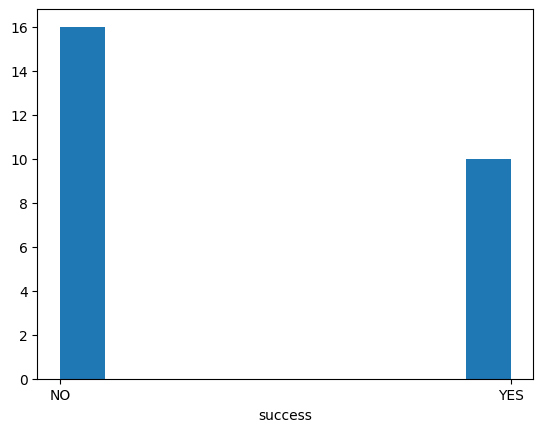

In [96]:
fig, ax = plt.subplots()

ax.hist(df["Success"].values)

#range_frame(ax, np.array([0, 1]), np.array([0, 16]))

ax.set_xlabel("success")
#ylabel_top("count")

fig.savefig("MOFsynthesis_reaction_success_count.png", bbox_inches="tight")

## Now, try to already build the dataframe with prompt and completion.


In [98]:
df.columns

Index(['MeOH:H2O', 'CAN:F3BDC molar ratio', 'F3BDC (mmol)', 'CAN (mmol) ',
       'T (°C)', 'HNO3 equivalents', 'V CAN (mL)', 'V F3BDC (mL)',
       'Vfinal (mL)', 'reaction time', 'yield', 'PXRD', 'Success'],
      dtype='object')

In [99]:
TEMPLATE = "a reaction of {CANMMOL} CAN, dissolved in {VCAN}, with {F3BDCMMOL} F3BDC, dissolved in {VF3BDC}, and {HNO3} HNO3 equivalents at {TEMP} C for {TIME}, Total volume {Vfinal} mL, CAN/linker ratio {CANF3BDC}"


In [100]:
_END_PROMPT = '###'
_END_COMPLETION = '@@@'

In [101]:
def format_row(row):
    prompt = TEMPLATE.format(
        **{
            "CANMMOL": row["CAN (mmol) "],
            "VCAN": row["V CAN (mL)"],
            "F3BDCMMOL": row["F3BDC (mmol)"],
            "VF3BDC": row["V F3BDC (mL)"],
            "HNO3": row["HNO3 equivalents"],
            "TIME": row["reaction time"],
            "TEMP": row["T (°C)"],
            "Vfinal": row["Vfinal (mL)"],
            "CANF3BDC": row["CAN:F3BDC molar ratio"],
        }
    )

    completion = str(1) if row['Success'] == 'YES' else str(0)

    return {
        'prompt_raw': prompt,
        'completion_raw': completion, 
        'prompt': prompt + _END_PROMPT, 
        'completion': completion + _END_COMPLETION
    }

In [102]:
format_row(df.iloc[0])

{'prompt_raw': 'a reaction of 0.45 CAN, dissolved in 1.8, with 0.409 F3BDC, dissolved in 7.2, and 35 HNO3 equivalents at 60 C for 2 h, Total volume 9.0 mL, CAN/linker ratio 1:1',
 'completion_raw': '0',
 'prompt': 'a reaction of 0.45 CAN, dissolved in 1.8, with 0.409 F3BDC, dissolved in 7.2, and 35 HNO3 equivalents at 60 C for 2 h, Total volume 9.0 mL, CAN/linker ratio 1:1###',
 'completion': '0@@@'}

In [103]:
all_rows = []

for i, row in df.iterrows():
    formatted = format_row(row)
    all_rows.append(formatted)

In [104]:
formatted = pd.DataFrame(all_rows)

In [105]:
formatted

,prompt_raw,completion_raw,prompt,completion
0,"a reaction of 0.45 CAN, dissolved in 1.8, with...",0,"a reaction of 0.45 CAN, dissolved in 1.8, with...",0@@@
1,"a reaction of 0.411 CAN, dissolved in 1.6, wit...",0,"a reaction of 0.411 CAN, dissolved in 1.6, wit...",0@@@
2,"a reaction of 0.365 CAN, dissolved in 1.5, wit...",0,"a reaction of 0.365 CAN, dissolved in 1.5, wit...",0@@@
3,"a reaction of 0.365 CAN, dissolved in 1.5, wit...",0,"a reaction of 0.365 CAN, dissolved in 1.5, wit...",0@@@
4,"a reaction of 0.375 CAN, dissolved in 0.8 (H2O...",0,"a reaction of 0.375 CAN, dissolved in 0.8 (H2O...",0@@@
5,"a reaction of 0.375 CAN, dissolved in 0.4 (H2O...",0,"a reaction of 0.375 CAN, dissolved in 0.4 (H2O...",0@@@
6,"a reaction of 0.375 CAN, dissolved in 1.5 (H2O...",1,"a reaction of 0.375 CAN, dissolved in 1.5 (H2O...",1@@@
7,"a reaction of 0.375 CAN, dissolved in 1.5 (H2O...",1,"a reaction of 0.375 CAN, dissolved in 1.5 (H2O...",1@@@
8,"a reaction of 0.375 CAN, dissolved in 1.5 (H2O...",0,"a reaction of 0.375 CAN, dissolved in 1.5 (H2O...",0@@@
9,"a reaction of 0.375 CAN, dissolved in 2.25 (H2...",1,"a reaction of 0.375 CAN, dissolved in 2.25 (H2...",1@@@


In [106]:
print(len(formatted))
formatted_drop = formatted.dropna(subset=['prompt_raw', 'completion_raw'])

print(len(formatted_drop))

26
26


In [110]:
formatted.to_csv('MOF_synthesis_train.csv')